In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

data_dir = "data/Takeout/Fit/Daily Aggregations"
all_files = glob.glob(data_dir + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True, sort=True)

df = df[['Date', 
         'Min diastolic blood pressure (mmHg)', 
         'Average diastolic blood pressure (mmHg)', 
         'Max diastolic blood pressure (mmHg)', 
         'Min systolic blood pressure (mmHg)', 
         'Average systolic blood pressure (mmHg)', 
         'Max systolic blood pressure (mmHg)']]

df = df.sort_values(by=['Date'])
df = df[df['Date'] >= '2019-04-11']

google_data = df

google_data.head(1000)

,Date,Min diastolic blood pressure (mmHg),Average diastolic blood pressure (mmHg),Max diastolic blood pressure (mmHg),Min systolic blood pressure (mmHg),Average systolic blood pressure (mmHg),Max systolic blood pressure (mmHg)
16428,2019-04-11,97.0,97.000000,97.0,147.0,147.000000,147.0
16429,2019-04-12,89.0,89.000000,89.0,142.0,142.000000,142.0
16430,2019-04-13,88.0,95.500000,103.0,140.0,140.500000,141.0
16431,2019-04-14,87.0,94.500000,102.0,144.0,150.500000,157.0
16432,2019-04-15,85.0,85.000000,85.0,141.0,141.000000,141.0
16433,2019-04-16,86.0,86.500000,87.0,138.0,140.000000,142.0
16434,2019-04-17,101.0,101.000000,101.0,152.0,152.000000,152.0
16435,2019-04-18,100.0,101.500000,103.0,135.0,138.500000,142.0
16436,2019-04-19,79.0,84.000000,89.0,130.0,138.000000,146.0
16437,2019-04-20,91.0,91.000000,91.0,137.0,137.000000,137.0


In [3]:
df = google_data[['Date', 'Average systolic blood pressure (mmHg)', 'Average diastolic blood pressure (mmHg)']]
df = df.set_index(df.columns[0])

nonans = df.dropna()
coefficients, residuals, _, _, _ = np.polyfit(range(len(nonans)),nonans,1,full=True)
mse = residuals[0] / (len(df.index))
nrmse = np.sqrt(mse) / (df.max() - df.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

Slope [-0.22110699 -0.10894028]
NRMSE: Average systolic blood pressure (mmHg)     0.181956
Average diastolic blood pressure (mmHg)    0.184844
dtype: float64


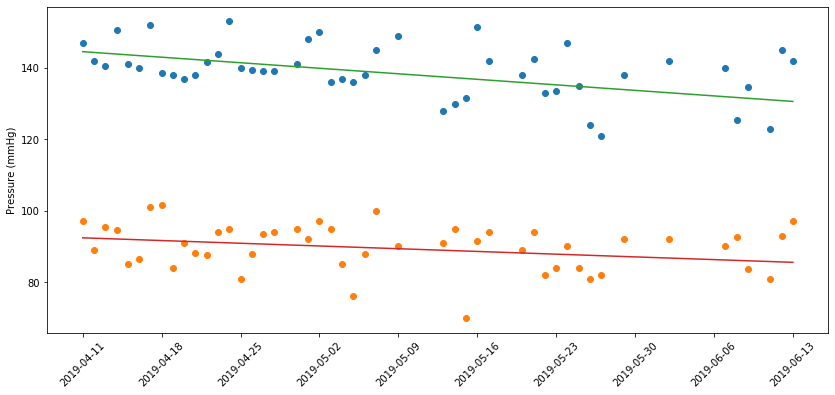

In [4]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(df, 'o')
plt.ylabel('Pressure (mmHg)')
plt.xticks(df.index[::7], df.index[::7], rotation=45)
plt.plot([coefficients[0] * x + coefficients[1] for x in range(len(df))])
plt.show()